# Zadanie 1

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
import seaborn as sns
import pandas as pd
from tqdm.auto import tqdm
sns.set_style('whitegrid')


%matplotlib inline

## Reading input data

In [33]:
def read_input_data(input_data):
    qap_instance_file = urllib.request.urlopen(input_data)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    
    return (n, A, B)

## Objective function

In [34]:
def qap_objective_function(p, n):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

## Simulated Annealing

In [35]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [278]:
def SA(T, radius, alpha):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q, n)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())

## a)
### Nug14

In [279]:
input_data = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug14.dat'

data = read_input_data(input_data)
n = data[0]
A = data[1]
B = data[2]

In [60]:
p = [8, 7, 12, 1, 0, 10, 6, 13, 2, 3, 11, 4, 5, 9]

print(qap_objective_function(p, n), p)

1014.0 [8, 7, 12, 1, 0, 10, 6, 13, 2, 3, 11, 4, 5, 9]


In [68]:
SA(500000, 1, 1.25)

52.46540546417236 1014.0


### Nug18

In [77]:
input_data = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug18.dat'

data = read_input_data(input_data)
n = data[0]
A = data[1]
B = data[2]

In [78]:
p = [9, 2, 13, 1, 17, 5, 6, 11, 14, 3, 4, 0, 10, 7, 16, 12, 8, 15]

print(qap_objective_function(p, n), p)

1930.0 [9, 2, 13, 1, 17, 5, 6, 11, 14, 3, 4, 0, 10, 7, 16, 12, 8, 15]


In [84]:
SA(500000, 1, 1.25)

63.733742475509644 1930.0


### Nug24

In [74]:
input_data = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug24.dat'

data = read_input_data(input_data)
n = data[0]
A = data[1]
B = data[2]

In [75]:
p = [16, 7, 10, 22, 3, 19, 14, 18, 21, 17, 2, 13, 0, 9, 6, 8, 15, 20, 23, 11, 5, 12, 4, 1]

print(qap_objective_function(p, n), p)

3488.0 [16, 7, 10, 22, 3, 19, 14, 18, 21, 17, 2, 13, 0, 9, 6, 8, 15, 20, 23, 11, 5, 12, 4, 1]


In [76]:
SA(500000, 1, 1.25)

80.42590069770813 3488.0


## b)

In [277]:
T = 1000

results = np.zeros(T)
for i in tqdm(range(T)):
    res = SA(500000, 1, 1.25)
    results[i] = res

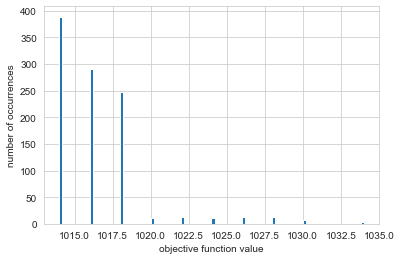

1016.402 3.157593387375898


In [276]:
plt.figure()
plt.hist(results, bins=100)
plt.xlabel('objective function value')
plt.ylabel('number of occurrences')
plt.show()

print(results.mean(), results.std())

## c)

In [223]:
input_data = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug14.dat'

rid = read_input_data(input_data)
n = rid[0]
A = rid[1]
B = rid[2]

In [228]:
def SA2(T, radius, alpha):

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n)
    costs = np.zeros(T)
    success = 0
    failure = 0
    success_measure = []
    failure_measure = []
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q, n)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
            success += 1
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
            failure += 1
        costs[t] = p_cost
        if t > 0 and t % 1000 == 0:
            success_measure.append(success)
            failure_measure.append(failure)
            success = 0
            failure = 0

    return (success_measure, failure_measure)

In [229]:
def print_measures(T, radius, alpha):
    measures = SA2(T, radius, alpha)
    title = 'T = ' + str(T) + ', radius = ' + str(radius) + ', alpha = ' + str(alpha)
    plt.figure()
    plt.plot(measures[0])
    plt.plot(measures[1])
    plt.title(title)
    plt.xlabel("Thousand")
    plt.ylabel("Number of s/f in one thousand")
    plt.legend(['success', 'failure'], loc='upper right')
    plt.show()

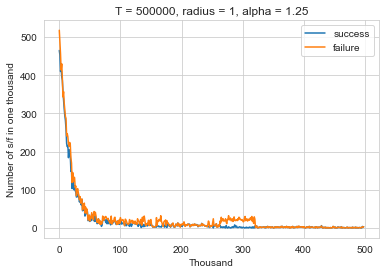

In [230]:
print_measures(500000, 1, 1.25)

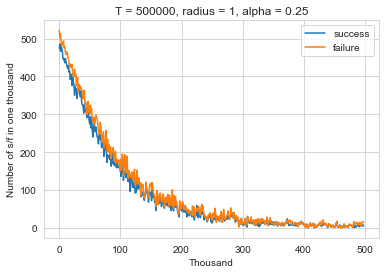

In [231]:
print_measures(500000, 1, 0.25)

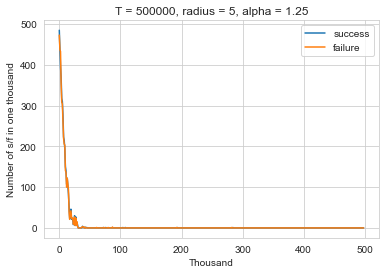

In [232]:
print_measures(500000, 5, 1.25)

## d)

In [156]:
def perm_dist(p0, p1):
    cnt = 0
    for i in range(len(p0)):
        if p0[i] != p1[i]:
            cnt += 1
    return cnt

In [214]:
def SA3(T, radius, alpha, results):
    
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q, n)
        if(q_cost < p_cost):
            results.append((perm_dist(p, q), p_cost - q_cost))
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
        
    return results

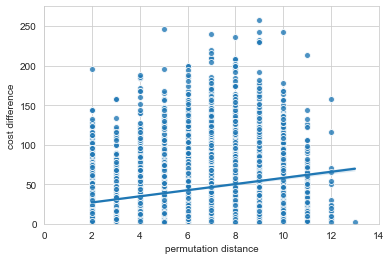

In [222]:
def print_dependencies():
    results = []
    
    for i in range(1, 8):
        SA3(100000, i, 1.25, results)
             
    results = [{'permutation distance': dist, 'cost difference': diff} for dist, diff in results]
    
    results_df = pd.DataFrame(results)

    a_plot = sns.regplot(x='permutation distance', y='cost difference', data = results_df, scatter_kws={'edgecolor': 'white'})
    a_plot.set(xlim=(0, 14))
    a_plot.set(ylim=(0, 275))

print_dependencies()

## e)

In [291]:
def modified_SA(T, radius):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n)
    costs = np.zeros(T)
    temp = p_cost * 0.5
    print(temp)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q, n)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- 1.0 * (q_cost - p_cost) / temp)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
        temp = 0.99999 * temp

    print(time.time() - t0, costs.min())

In [288]:
SA(500000, 1, 1.0)

55.32289457321167 1014.0


In [292]:
modified_SA(400000, 1)

663.0
41.065154790878296 1014.0


In [297]:
SA(400000, 1, 1.0)

41.68435573577881 1018.0
